In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib

import os
# from google.colab import drive
# drive.mount('/content/drive')
# os.chdir(r'/content/drive/My Drive/AAI courses/AAI 521 CV/final_project')

In [2]:
path = "data/lfw-deepfunneled/lfw-deepfunneled"

pictures = []
labels = []

for person in os.listdir(path):
    curr_path = os.path.join(path, person)
    if os.path.isdir(curr_path):
        for pic in os.listdir(curr_path):
            if pic.endswith(".jpg"):
                pictures.append(plt.imread(os.path.join(curr_path, pic)))
                labels.append(person)

In [3]:
print(f"There is a total of {len(pictures)} pictures in the dataset")
print(f"There are {len(np.unique(labels))} celebrities")

There is a total of 13233 pictures in the dataset
There are 5749 celebrities


Let's print a few of the pictures along with the celebrity names

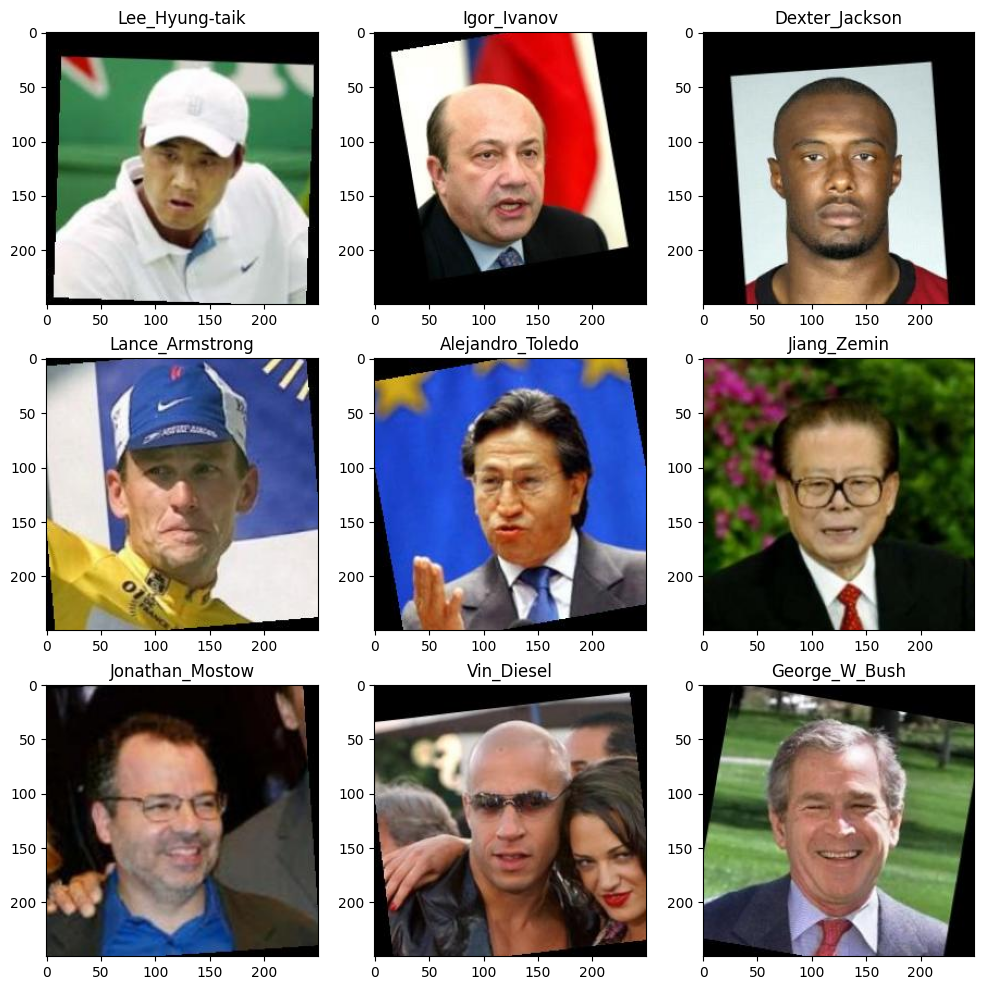

In [4]:
plt.figure(figsize=(12, 12))

for i in range(9):
    plt.subplot(3, 3, i+1)
    idx = np.random.randint(0, len(pictures))
    plt.imshow(pictures[idx])
    plt.title(labels[idx])

plt.show()

As we can see above, the images all have the same resolution of 250x250 and 3 channels. We also notice that the images are rotated to some degree.  
Also note that some pictures may have more than one face.

In [5]:
df = pd.DataFrame({"labels": labels, "images": pictures})

In [6]:
df

,labels,images
0,Aaron_Eckhart,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,Aaron_Guiel,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,Aaron_Patterson,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,Aaron_Peirsol,"[[[238, 244, 240], [238, 244, 240], [238, 244,..."
4,Aaron_Peirsol,"[[[0, 45, 131], [7, 53, 139], [7, 55, 139], [6..."
...,...,...
13228,Zorica_Radovic,"[[[5, 2, 0], [4, 1, 0], [2, 2, 0], [0, 1, 0], ..."
13229,Zulfiqar_Ahmed,"[[[34, 33, 39], [35, 34, 40], [36, 35, 40], [3..."
13230,Zumrati_Juma,"[[[15, 0, 0], [22, 6, 7], [25, 9, 10], [21, 5,..."
13231,Zurab_Tsereteli,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [7]:
val_counts = df["labels"].value_counts()

print("Percentage of celebrities with 2 pictures or less: ",
      round(sum(val_counts.values <= 2) / len(val_counts) * 100, 2), "%",
     sep="")

Percentage of celebrities with 2 pictures or less: 84.33%


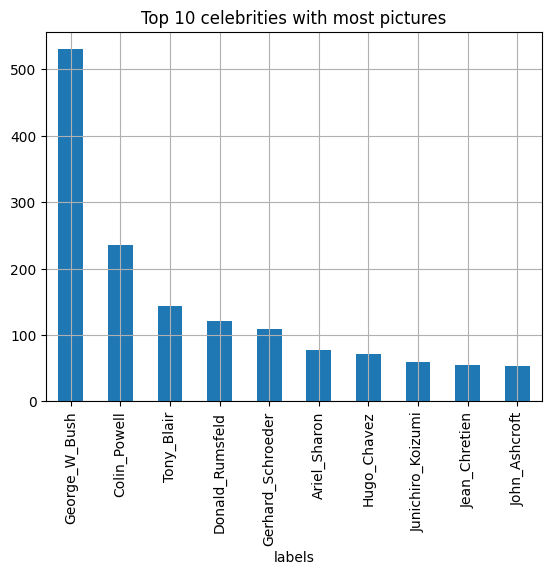

In [8]:
df["labels"].value_counts()[:10].plot(kind="bar")
plt.grid()
plt.title("Top 10 celebrities with most pictures")
plt.show()

George Bush has the most pictures coming in at over 500.

### Note that the following lines of code we didn't eventually use as we eventually moved the data from the data folder directly. That script is under the name *dataset_cleanup*

We will train the model with the pictures of the celebrities with one picture (which we won't have a way to validate those unless we collect more data) and with all the pictures of the celebrities that have more than one picture except for the last. This means that we will be testing our model with at most one picture from each celebrity.

In [3]:
# duplicated_mask = df.duplicated(subset='labels', keep=False)

# train_mask = ~duplicated_mask | df.duplicated(subset='labels', keep='last')
# df_train = df[train_mask]
# df_valid = df[~train_mask]

Our model script *detector.py* expects the training data to be within the training folder with each celebrity having one folder and similarly for the validation set, we will write code to split the data that way.

In [4]:
# def write_pics(df, path):
#     for index, row in df.iterrows():
#         name = row["labels"]
#         img = row["images"]
        
#         os.makedirs(rf"./{path}/{name}", exist_ok=True)
#         plt.imsave(rf"./{path}/{name}/{name}_{index}.jpg", img)

In [5]:
# write_pics(df_train, "training/")

In [8]:
# write_pics(df_valid, "validation")